In [16]:
from ceviche import fdtd
from ceviche.constants import *
import autograd.numpy as np
import matplotlib.pylab as plt

Load in the permittivity distribution from an FDFD simulation

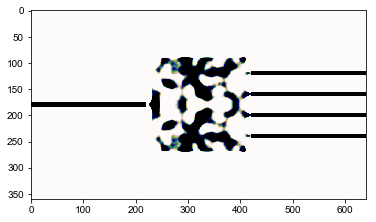

In [17]:
def reshape_arr(arr, Nx, Ny):
    return arr.reshape((Nx, Ny, 1))

eps_r = np.load('data/eps_r_splitter4.npy')
J_in = np.load('data/J_in.npy')
J_outs = np.load('data/J_list.npy')
plt.imshow(eps_r.T, cmap='gist_earth_r')
plt.show()

Nx, Ny = eps_r.shape
eps_r = reshape_arr(eps_r, Nx, Ny)
J_in = reshape_arr(eps_r, Nx, Ny)
J_outs = reshape_arr(eps_r, Nx, Ny)

Nz = 1

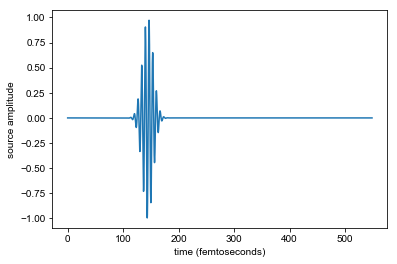

In [31]:
nx, ny, nz = Nx//2, Ny//2, Nz//2

dL = 5e-8
pml = [20, 20, 0]

F = fdtd(eps_r, dL=dL, npml=pml)

# source parameters
steps = 11400
t0 = 3000
sigma = 200       
source_amp = 5e-1
omega = 2 * np.pi * C_0 / 2e-6  # units of 1/sec
omega_sim = omega * F.dt       # unitless time

gaussian = lambda t: np.exp(-(t - t0)**2 / 2 / sigma**2) * np.cos(omega_sim * t)
source = lambda t: J_in * source_amp * gaussian(t)

plt.plot(1e15 * F.dt * np.arange(steps), gaussian(np.arange(steps)))
plt.xlabel('time (femtoseconds)')
plt.ylabel('source amplitude')
plt.show()

working on axis 0
working on axis 1
working on axis 2
working on axis 3
working on axis 4
working on axis 5
working on axis 6
working on axis 7
working on axis 8
working on axis 9


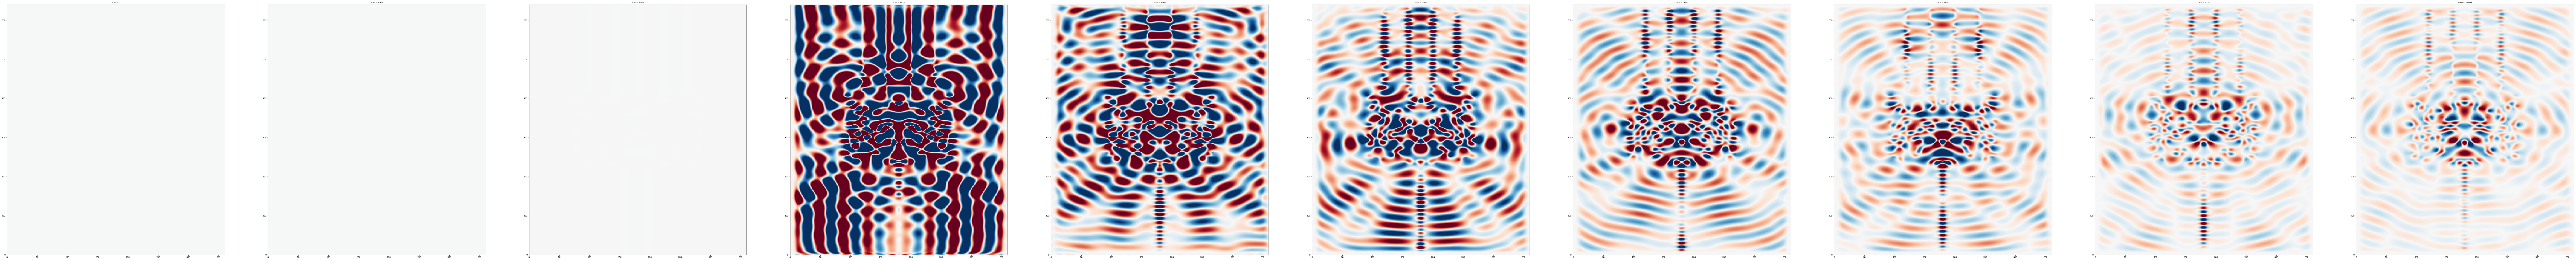

In [32]:

def aniplot(F, source, steps, num_panels=10):

    f, ax_list = plt.subplots(1, num_panels, figsize=(20*num_panels,20))
    Nx, Ny, _ = F.eps_r.shape
    
    ax_index = 0
    for t_index in range(steps):

        fields = F.forward(Jz=source(t_index))
    
        if t_index % (steps // num_panels) == 0:
            print('working on axis {}'.format(ax_index))
            im_t = ax_list[ax_index].pcolormesh(np.zeros((Nx, Ny)), cmap='RdBu')

            max_E = np.abs(fields['Ez']).max()
            im_t.set_array(fields['Ez'][:, :, 0].ravel().T)
            im_t.set_clim([-1, 1])
            ax_list[ax_index].set_title('time = {}'.format(t_index))
            ax_index += 1

aniplot(F, source, steps)